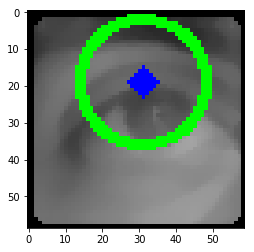

KeyboardInterrupt: 

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython import display
import os
import numpy as np
import cv2 as cv

with picamera.PiCamera() as camera:
    camera.resolution = (640, 480)
    camera.framerate = 24
    
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
    
    while True:
        time.sleep(0.1)
        output = np.empty((480, 640, 3), dtype=np.uint8)
        camera.capture(output, 'rgb')
        
        gray = cv.cvtColor(output, cv.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#         print('FACES', faces)

        for (x, y, w, h) in faces:
            cv.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
#             print('EYES', eyes)
            for (ex, ey, ew, eh) in eyes[1:2]:
                cv.rectangle(roi_gray, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                eroi = roi_gray[ey:ey+eh, ex:ex+ew]
        
        
        img = cv.medianBlur(eroi, 5)
        cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

        circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 2, 50, param1=1, param2=30, minRadius=0, maxRadius=60)
#         print(circles)
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Draw the center of the circle.
                cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    #         plt.imshow(gray)
#             plt.imshow(eroi)
            plt.imshow(cimg)

#         plt.imshow(gray)
        display.clear_output(wait=True)
        plt.pause(0.1)    # the pause time is = 1 / framerate

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython import display
import os
import numpy as np
import cv2 as cv

with picamera.PiCamera() as camera:
    camera.resolution = (640, 480)
    camera.framerate = 24
    
    eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
    
    while True:
        time.sleep(0.1)
        output = np.empty((480, 640, 3), dtype=np.uint8)
        camera.capture(output, 'rgb')
        
        gray = cv.cvtColor(output, cv.COLOR_BGR2GRAY)
        eyes = eye_cascade.detectMultiScale(gray)
        for (ex, ey, ew, eh) in eyes[1:2]:
            cv.rectangle(gray, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            eroi = gray[ey:ey+eh, ex:ex+ew]
        
        
        img = cv.medianBlur(eroi, 5)
        cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

#         circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 2, 50, param1=1, param2=30, minRadius=0, maxRadius=60)
        circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 100, param1=2, param2=40, minRadius=0, maxRadius=0)
        print(circles)
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Draw the center of the circle.
                cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    #         plt.imshow(gray)
#             plt.imshow(eroi)
            plt.imshow(cimg)
#             plt.show()

#         plt.imshow(eroi)
        display.clear_output(wait=True)
        plt.pause(0.1)    # the pause time is = 1 / framerate

KeyboardInterrupt: 

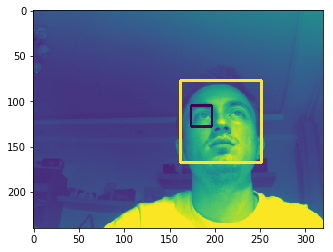

In [13]:
plt.imshow(gray)

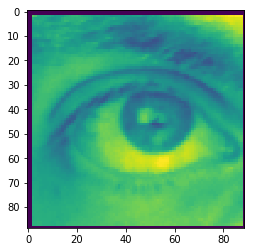

In [42]:
plt.imshow(eroi)

[[[41.5 62.5 39.4]]]


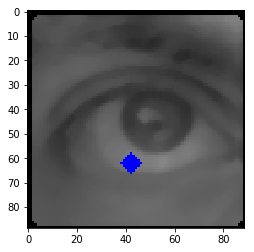

In [76]:
img = cv.medianBlur(eroi, 5)
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 100, param1=2, param2=40, minRadius=0, maxRadius=0)
print(circles)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
#         cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.imshow(cimg)